# 연구과제 2번 사과 품질별 분류

## #1. 패키지 참조

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

## #2. 데이터 불러오기 및 특성 확인

In [2]:
origin = my_read_excel('C:/Users/Jihwan/Desktop/01Class/E.추론통계/E.InferentialStatistics/수업자료/apple_quality.xlsx',index_col='A_id')

<class 'pandas.core.frame.DataFrame'>
Index: 4001 entries, 0.0 to nan
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.3+ KB
None

데이터프레임 상위 5개 행
+--------+-----------+----------+-------------+---------------+-------------+------------+-----------+-----------+
|   A_id |      Size |   Weight |   Sweetness |   Crunchiness |   Juiciness |   Ripeness |   Acidity | Quality   |
|--------+-----------+----------+-------------+---------------+-------------+------------+-----------+-----------|
|      0 |  -3.97005 | -2.51234 |     5.34633 |      -1.01

> - 총 4001개의 행과 8개의 열로 구성, id를 인덱스로 지정
> - 'Quality'라는 사과 품종의 좋고 나쁨의 여부가 종속변수이고 나머지 7개의 변수가 있음
> - 종속변수의 타입은 object이고 독립변수는 Acidity가 Object인 것을 제외하면 모두 float 타입임
> - 결측치는 제일 마지막 행에 1개 존재하는 것으로 보임
> - 연속형 독립변수들의 데이터 분포는 중간값과 평균을 보았을 때 크게 정규분포를 벗어나 보이지는 않음
> - Id를 인덱스로 잡았으나 Id는 각 1개씩 있고 종속변수에 영향을 주지 않을 것으로 판단됨
> ==================================================================
> - <전처리 방향>
> - 타입변환(종속변수->카테고리, 라벨링, Acidity -> float타입)
> - 결측치 1행 제거
> - 이상치 확인 후 제거 및 대체 여부 판단
> -  Id컬럼 제거 

## #3. 전처리

### (1) null값 확인 및 제거

In [3]:
origin.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

> null값이 1개씩 밖에 없으므로 제거

In [4]:
df = origin.dropna()
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

### (2) 이상치 확인

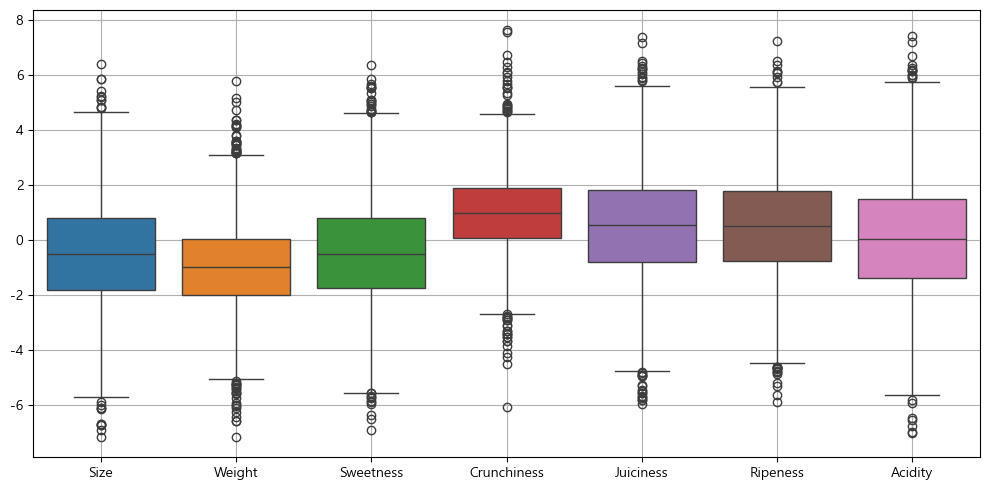

In [5]:
my_boxplot(df)

> - 이상치가 다수 보이나 과일 특성상 존재 가능하다고 보고 이상치 제거 없이 진행
> - 데이터 분포의 범위가 크게 다르지 않아 표준화가 필요 없을 것 같다.

### (3) 타입변환, 라벨링

In [6]:
# Acidity -> float type으로 변환, 종속변수
df['Acidity'] = df['Acidity'].astype('float')
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [7]:
# 종속변수 라벨링, 타입 변환
df['Quality'] = df['Quality'].map({'bad':0,'good':1})
df['Quality'] = df['Quality'].astype('category')
df.head()


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


### (4) 인덱스(id)제거

In [8]:
df.reset_index(drop=True,inplace=True)
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


## #4. 탐색적 데이터 분석 

#### (1) 연속형 변수의 데이터 분포 확인

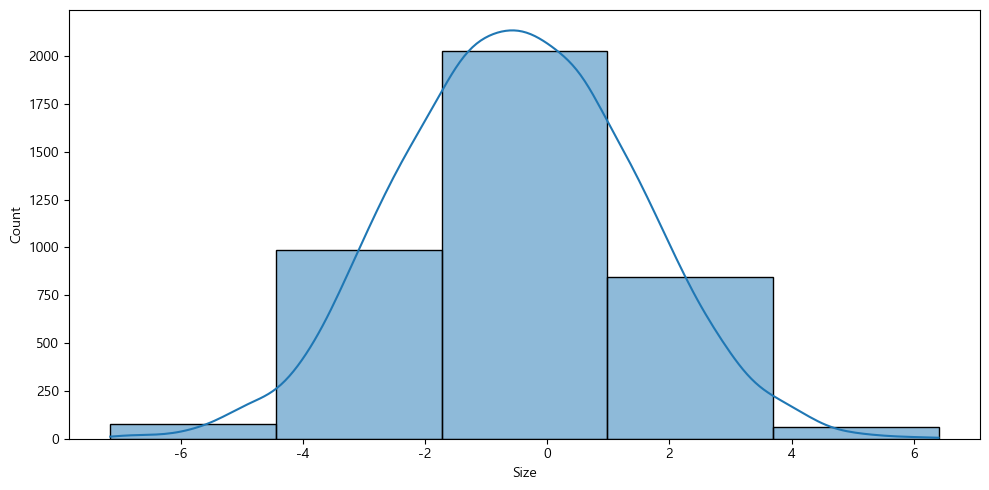

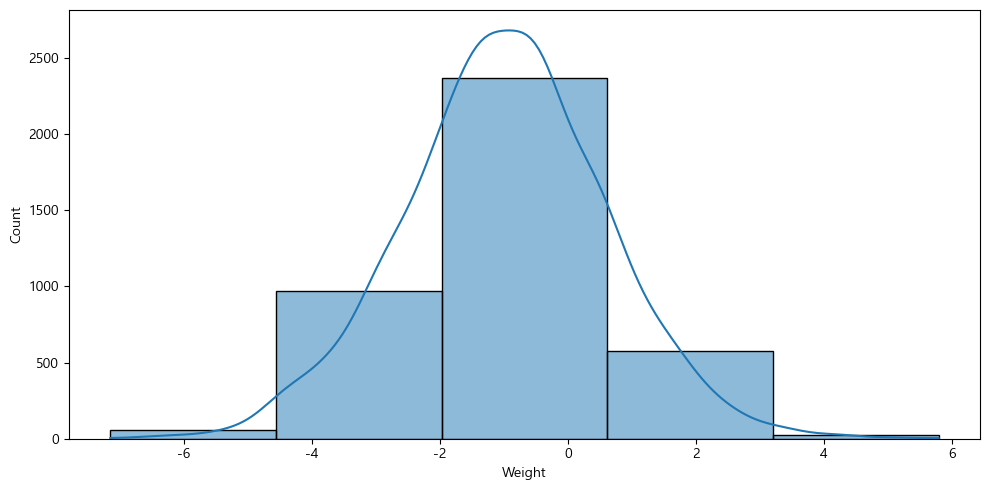

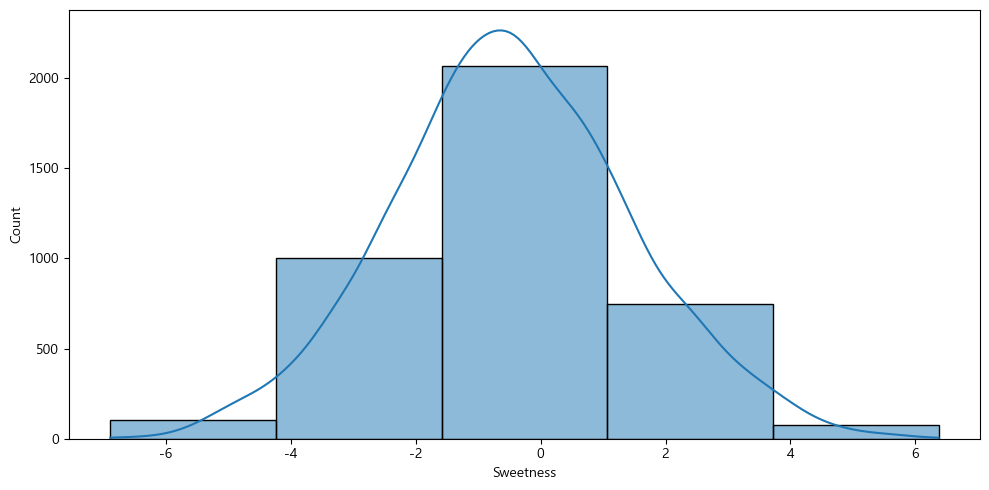

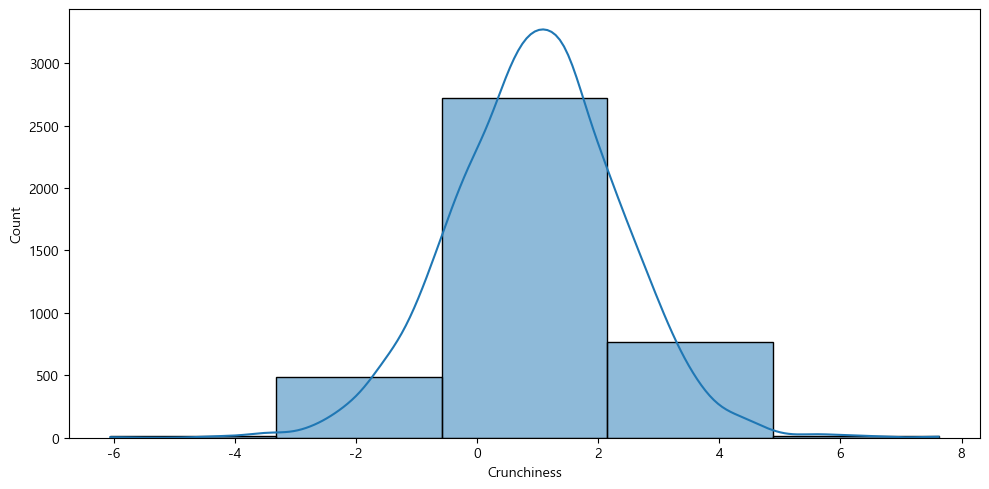

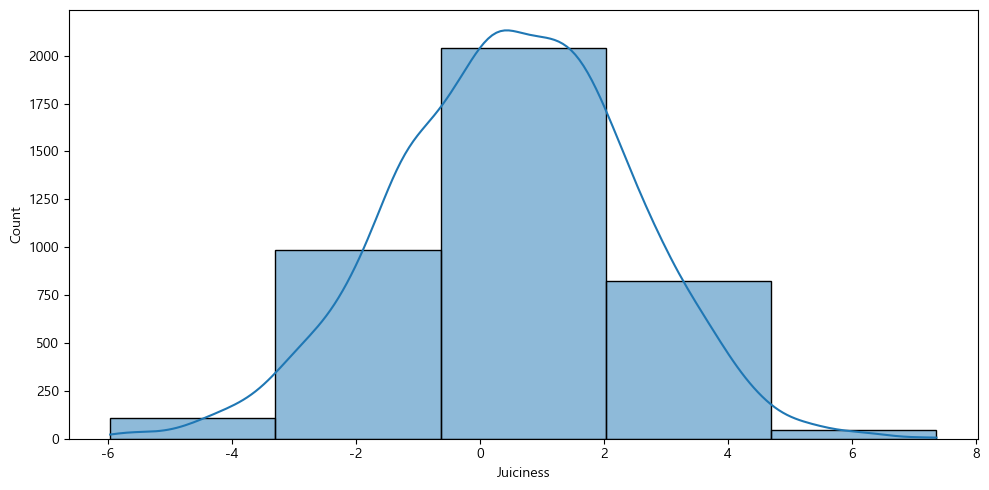

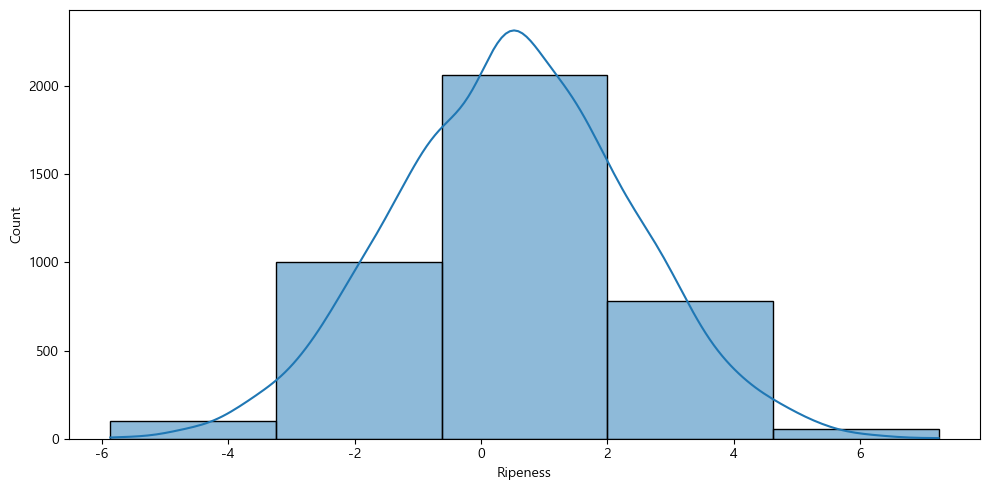

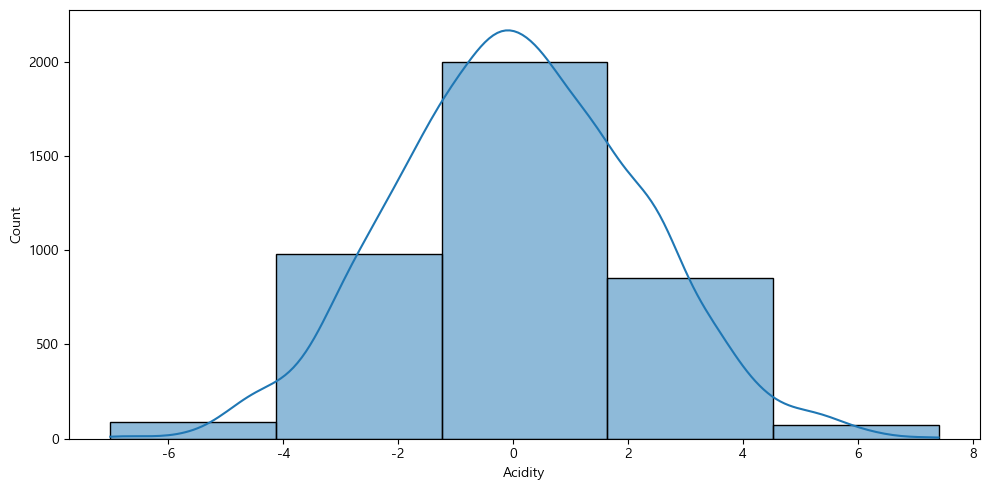

In [9]:
for c in ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']:
    my_histplot(df, c, bins=5, dpi=100)

> 연속형 변수는 거의 정규분포 형태를 띄고 있음

In [10]:
# 종속변수의 데이터 분포 확인
df['Quality'].value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

#### (2) 종속변수에 따른 독립변수의 분포

In [11]:
df['Quality'] = df['Quality'].astype('category')
df.dtypes

Size            float64
Weight          float64
Sweetness       float64
Crunchiness     float64
Juiciness       float64
Ripeness        float64
Acidity         float64
Quality        category
dtype: object

In [12]:
yname = 'Quality'
xnames = list(df.drop(yname, axis=1).columns)

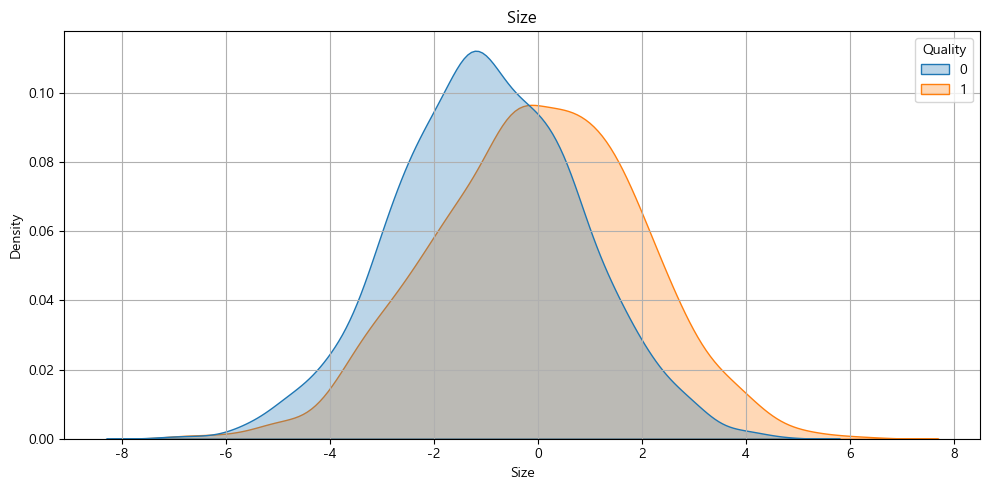

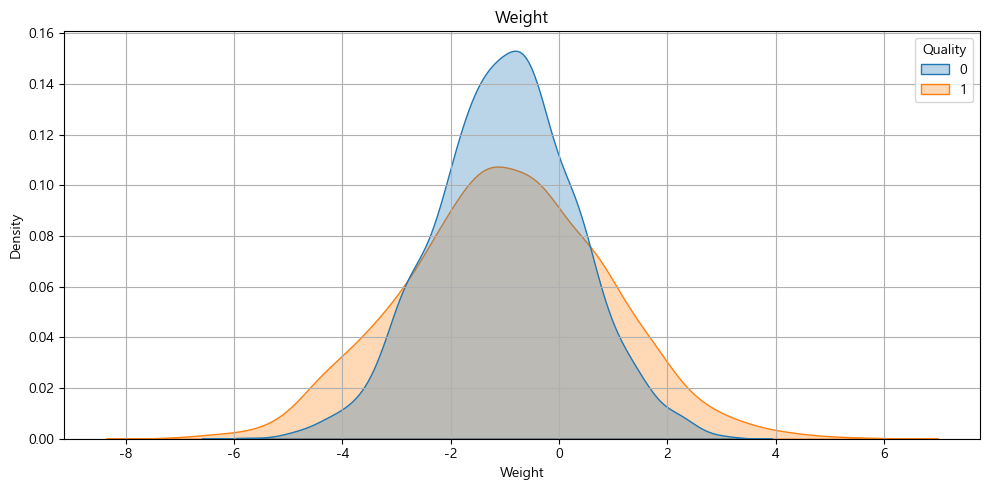

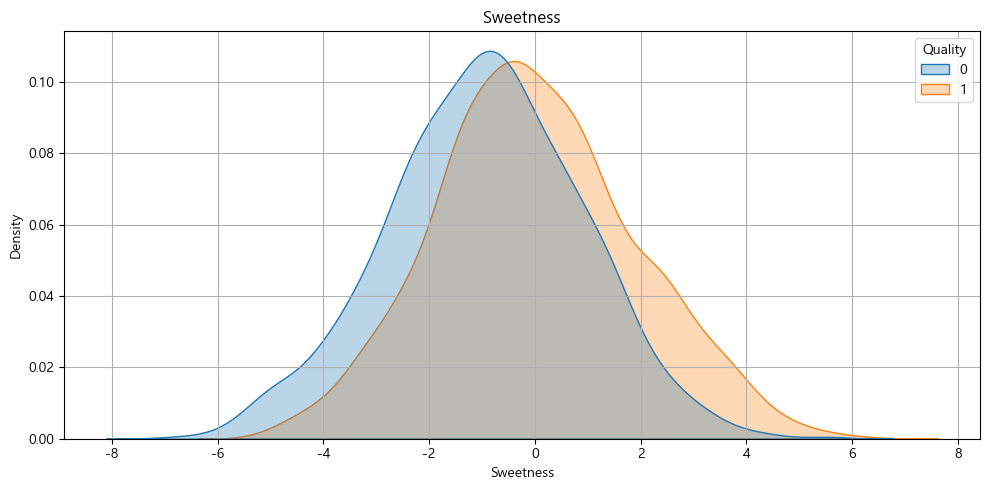

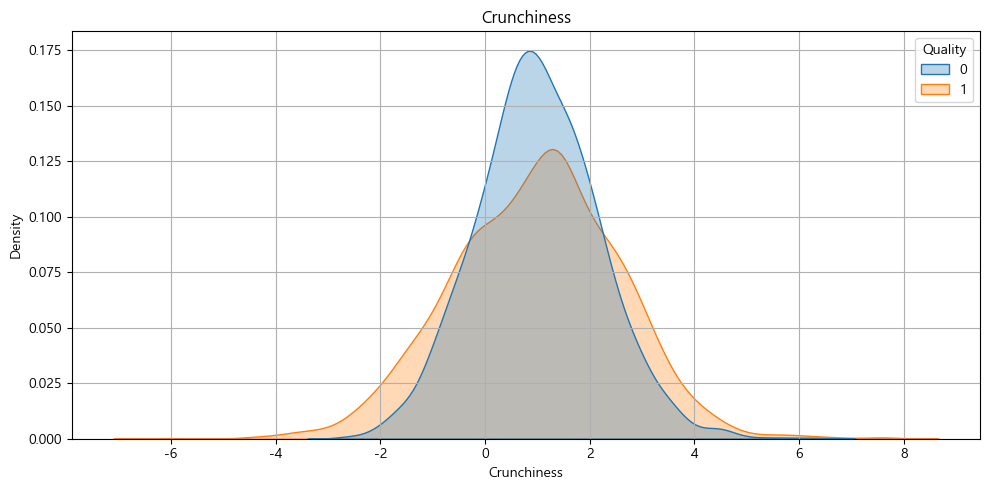

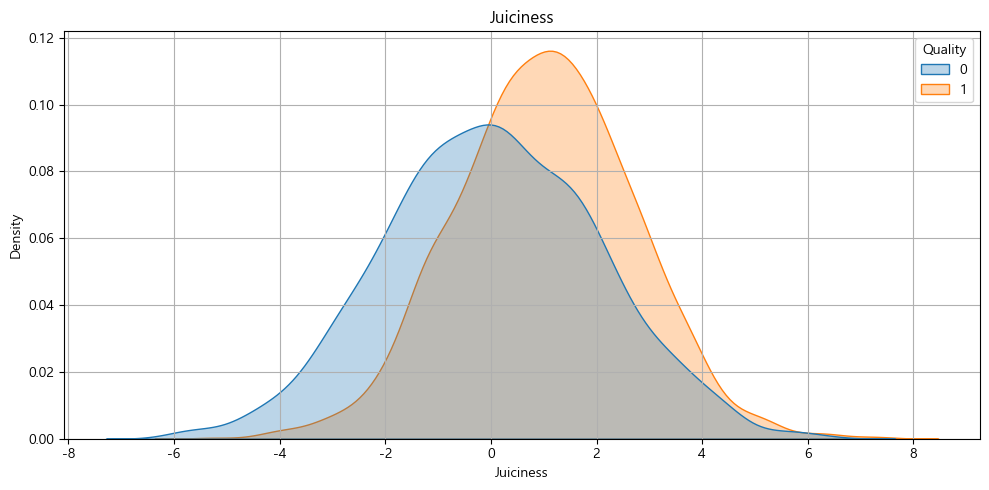

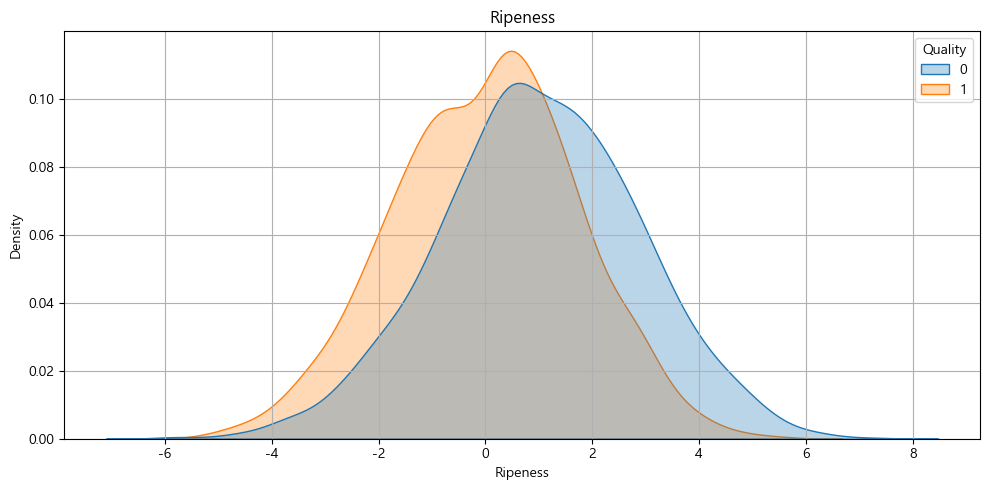

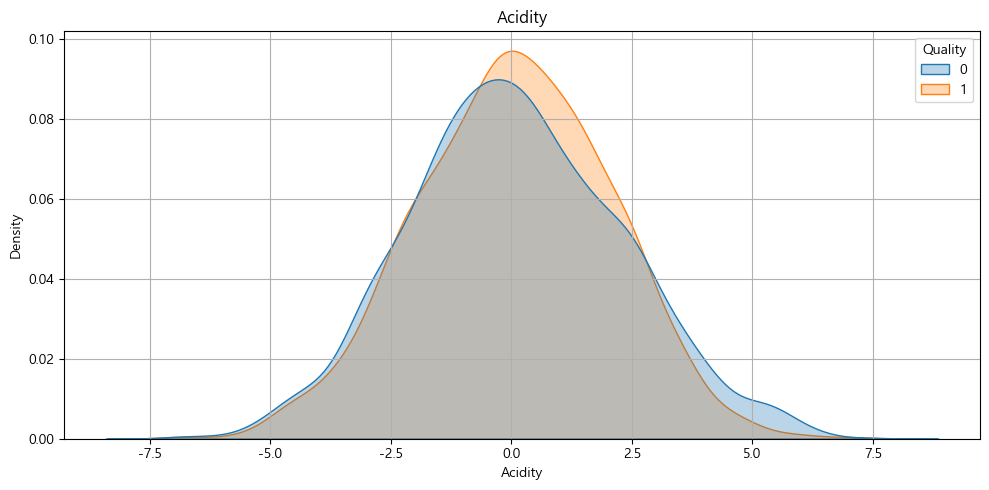

In [13]:
for x in xnames:
    if df[x].dtype == 'category':
        my_stackplot(df, xname=x, hue=yname, dpi=100, callback=lambda ax: ax.set_title(x))
    else:
        my_kdeplot(df, xname=x, hue=yname, fill=True, dpi=100, callback=lambda ax: ax.set_title(x))

> 종속변수에 따라 데이터 분포를 비교한 결과 유의미한 결과가 나오지 않았다.

#### (3) 각 변수간의 관계 파악

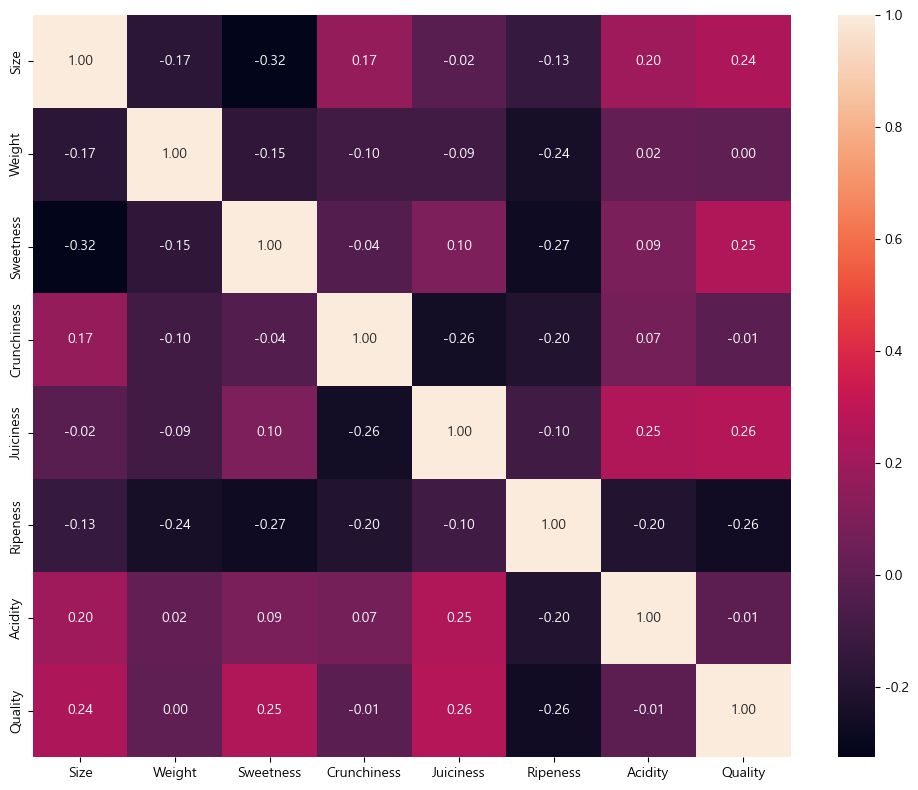

+------------------------------+---------------+-------------+----------+
|                              |   correlation |     p-value | result   |
|------------------------------+---------------+-------------+----------|
| ('Size', 'Weight')           |     -0.170702 | 1.55637e-27 | True     |
| ('Size', 'Sweetness')        |      -0.32468 | 7.55133e-99 | True     |
| ('Size', 'Crunchiness')      |      0.169868 | 2.80558e-27 | True     |
| ('Size', 'Juiciness')        |    -0.0188924 |    0.232245 | False    |
| ('Size', 'Ripeness')         |     -0.134773 | 1.12667e-17 | True     |
| ('Size', 'Acidity')          |      0.196218 | 5.24603e-36 | True     |
| ('Size', 'Quality')          |      0.244007 | 2.62825e-55 | True     |
| ('Weight', 'Size')           |     -0.170702 | 1.55637e-27 | True     |
| ('Weight', 'Sweetness')      |     -0.154246 |  1.0085e-22 | True     |
| ('Weight', 'Crunchiness')    |    -0.0958817 | 1.23063e-09 | True     |
| ('Weight', 'Juiciness')      |    -0

In [14]:
my_correlation(df[['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity','Quality']],dpi=100)

> 상관행렬 분석 결과 약하지만 품질에 가장 큰 영향을 미치는 것은 익은 정도, 과즙의 풍부함, 크기가 양의 상관관계가 있는 것으로 나타났다. 나머지 변수들간에는 특별히 강한 상관관계는 나타나지 않았다.

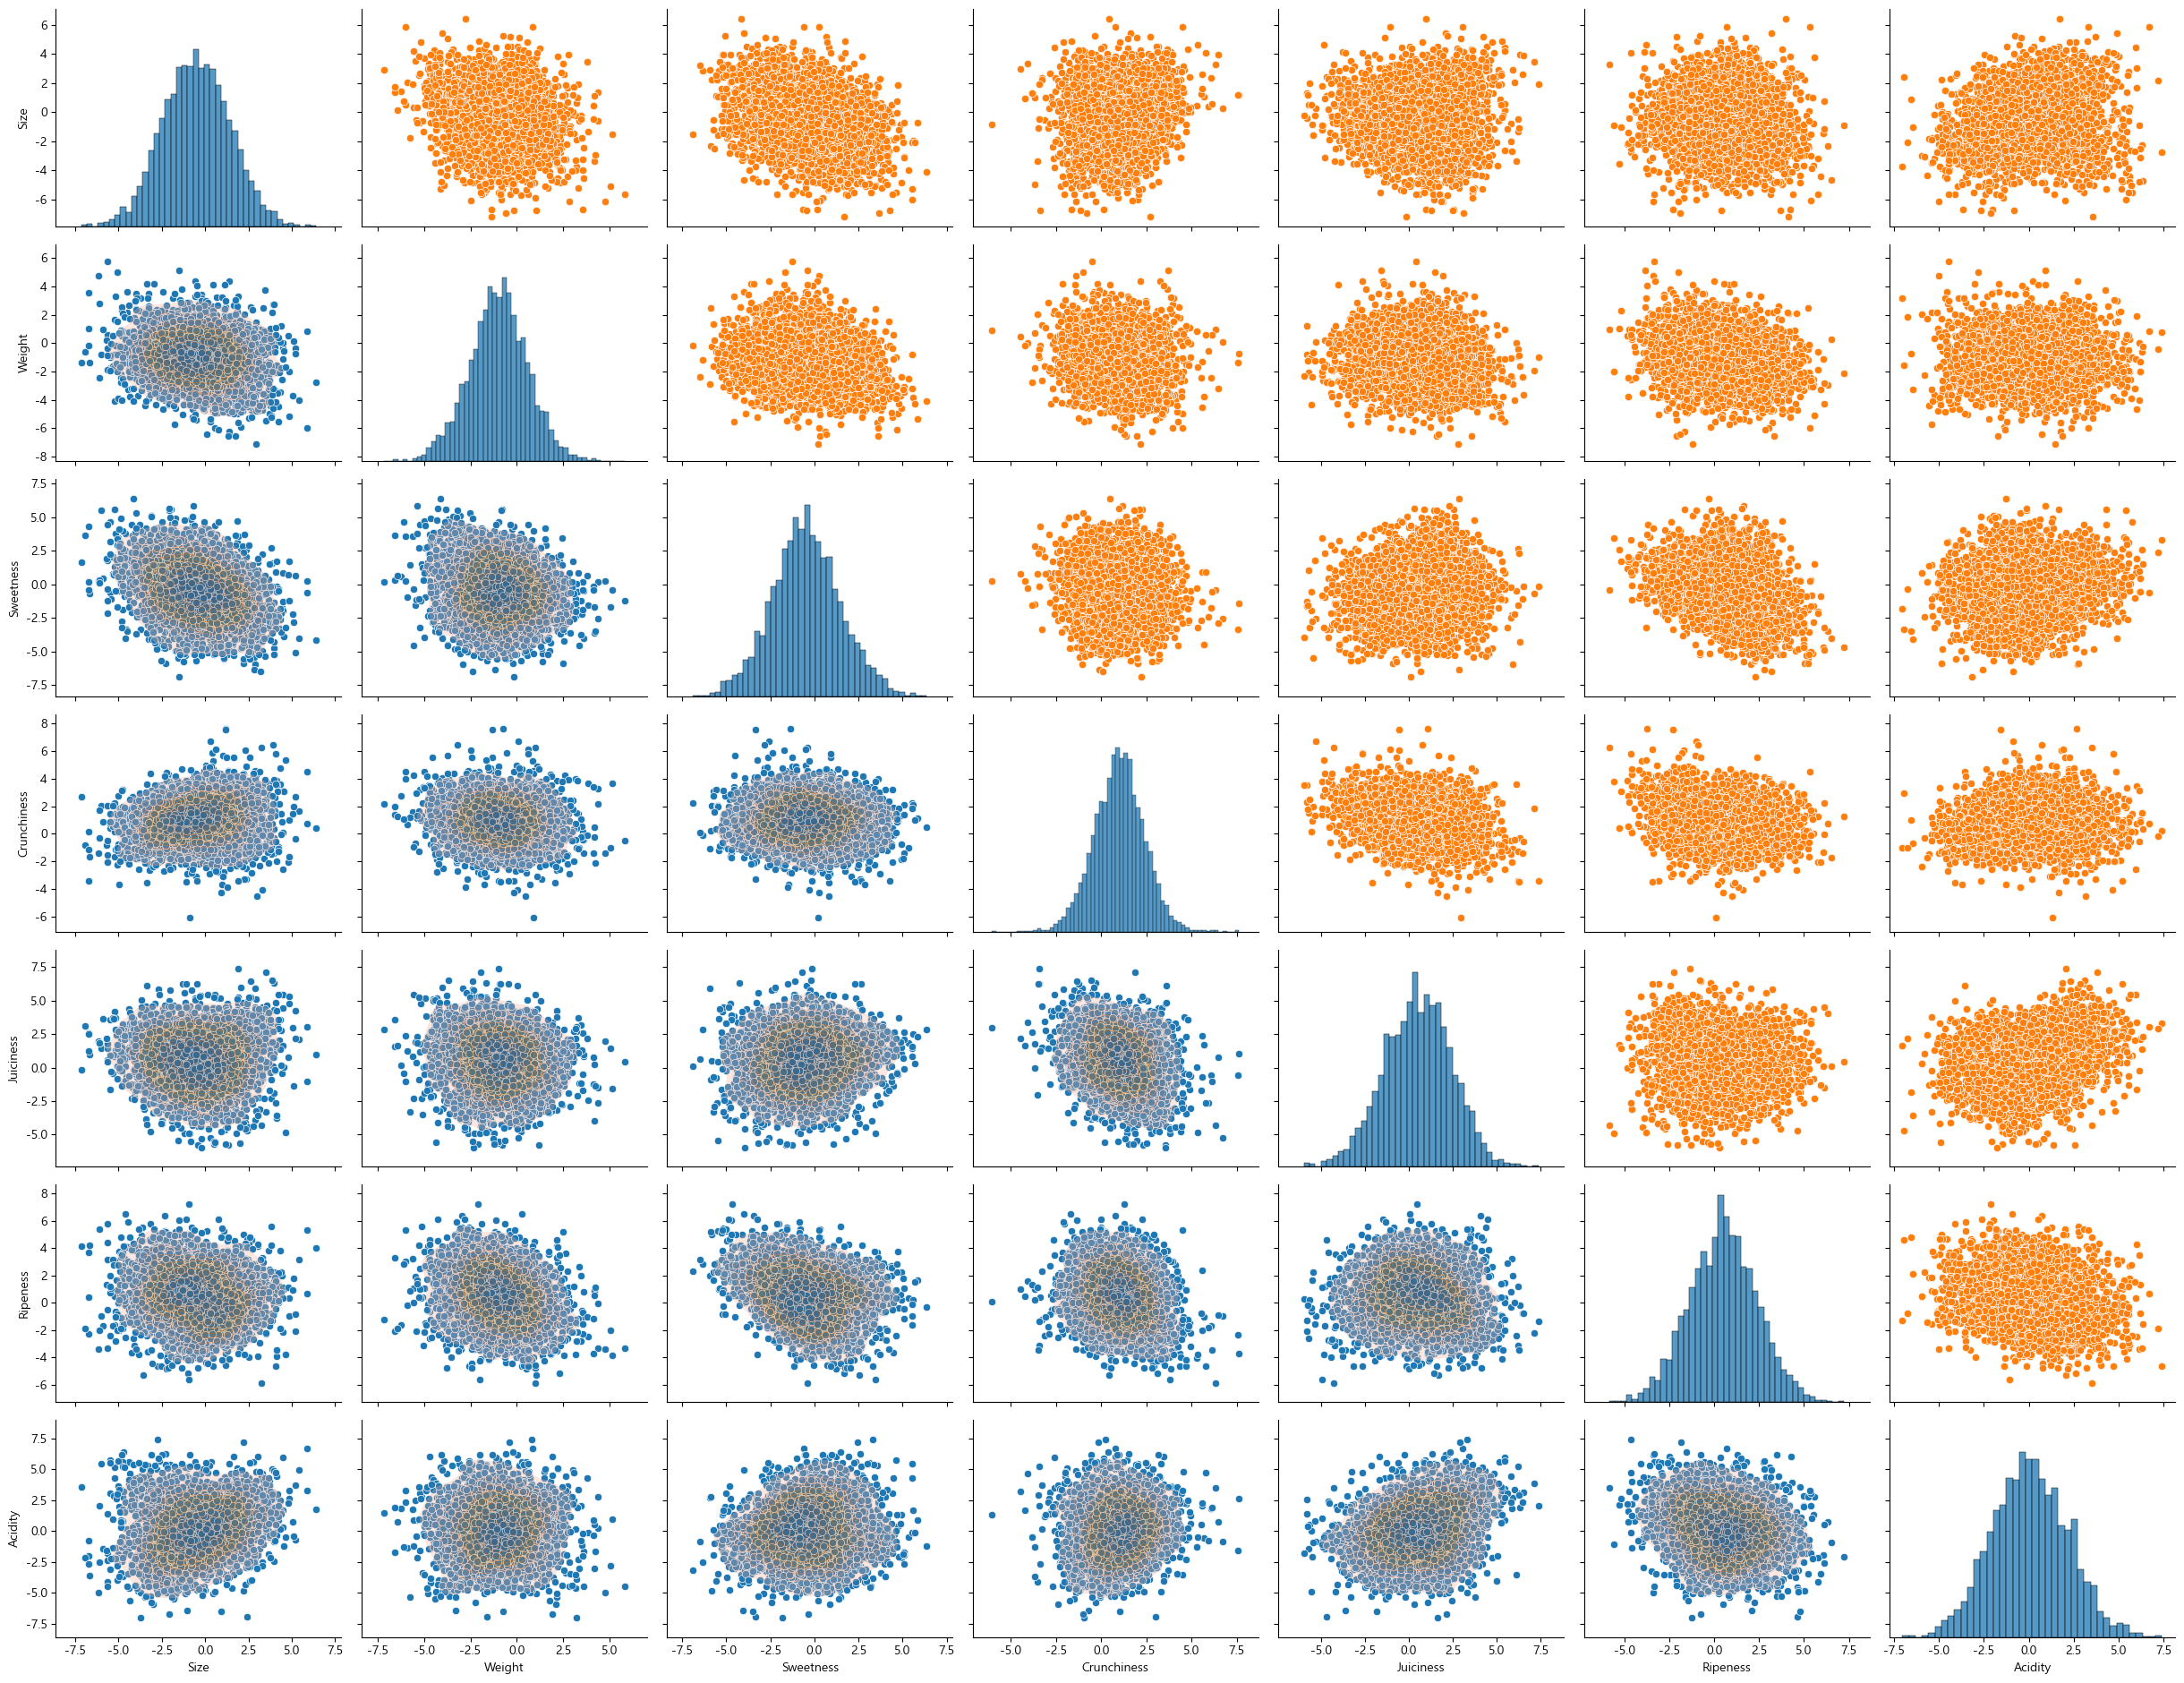

In [15]:
my_pairplot(df[['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']],dpi=100)

## #5. 로지스틱 분석 

#### (1) 데이터 분할

In [114]:
# 종속형 변수 정수형 타입으로 변환
df['Quality'] = df['Quality'].astype('int')
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality          int32
dtype: object

In [115]:
x_train, x_test, y_train, y_test = my_train_test_split(df, yname='Quality')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3200, 7), (800, 7), (3200,), (800,))

#### (2) 로지스틱 회귀

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |            0.7525 |
+----+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.267281 |     0.219213 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.752812 |      0.73625 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision)       |     0.746828 |     0.722892 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)          |     0.768657 |     0.757576 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout)       |     0.263191 |     0.284653 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)         

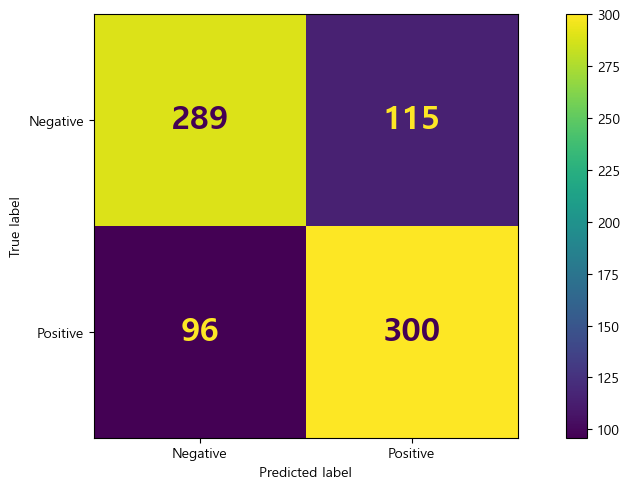

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


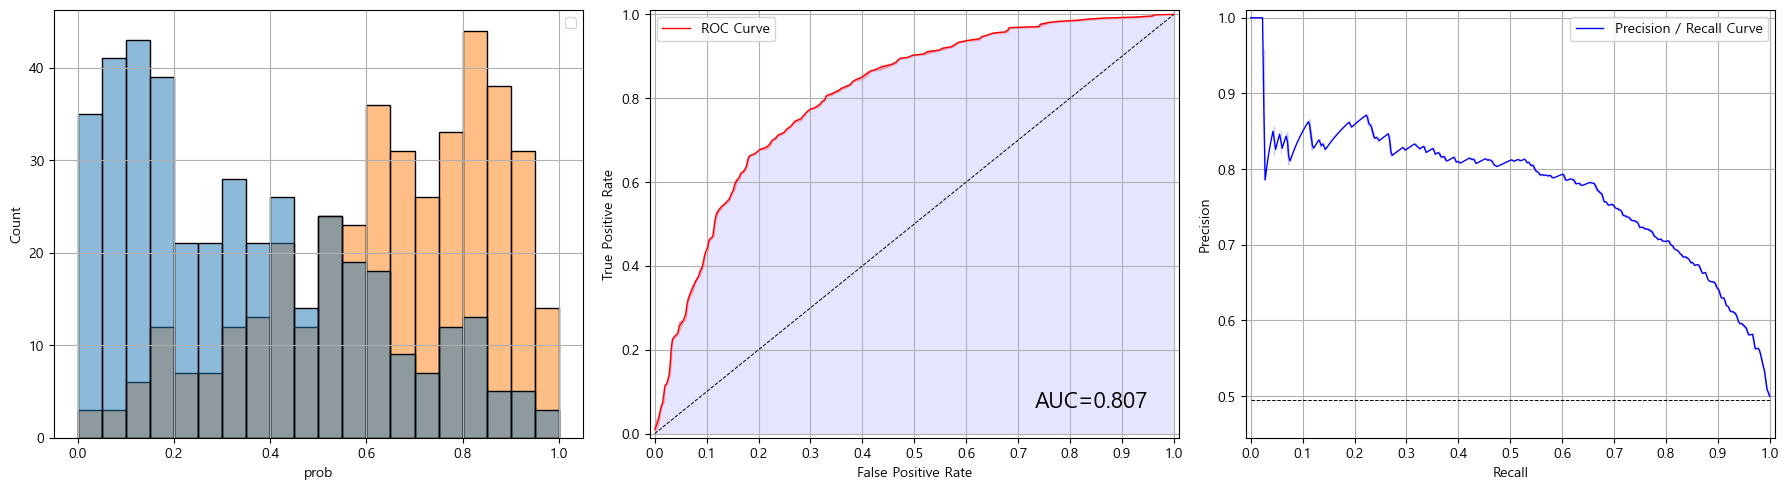


[학습곡선]


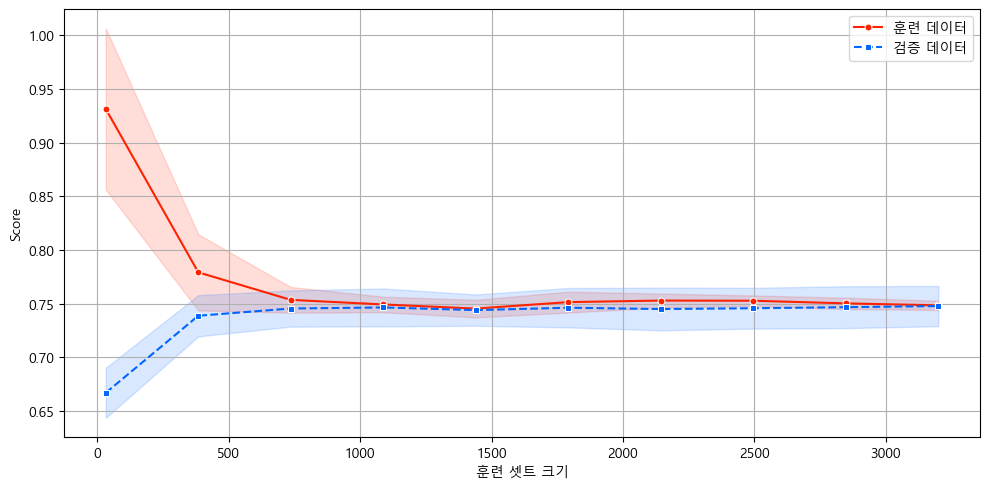

LogisticRegression(n_jobs=-1)

In [116]:
my_classification(LogisticRegression,x_train, y_train, x_test, y_test)

#### (3) KNN

[교차검증]
+----+-------------------+
|    |   mean_test_score |
|----+-------------------|
|  0 |          0.895937 |
+----+-------------------+

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |         0.93 |      0.89375 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.923501 |     0.897698 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.938433 |     0.886364 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0785176 |    0.0990099 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.921482 |      0.90099 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.930907 |     0.891995 | 정밀도와 

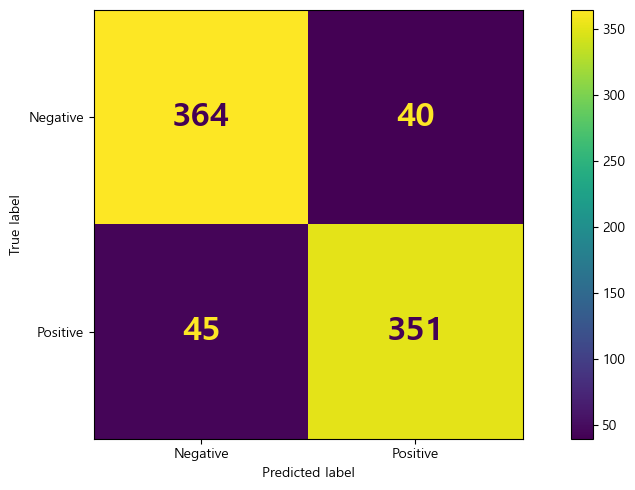


[Roc Curve]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


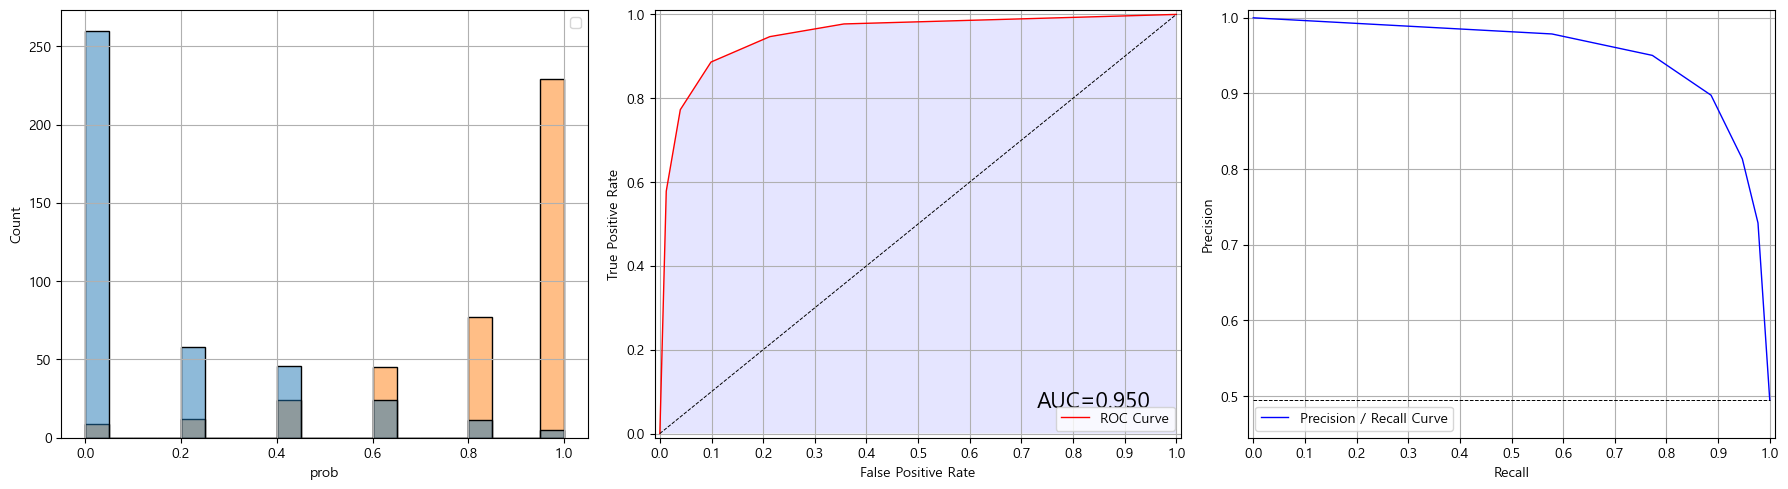


[학습곡선]


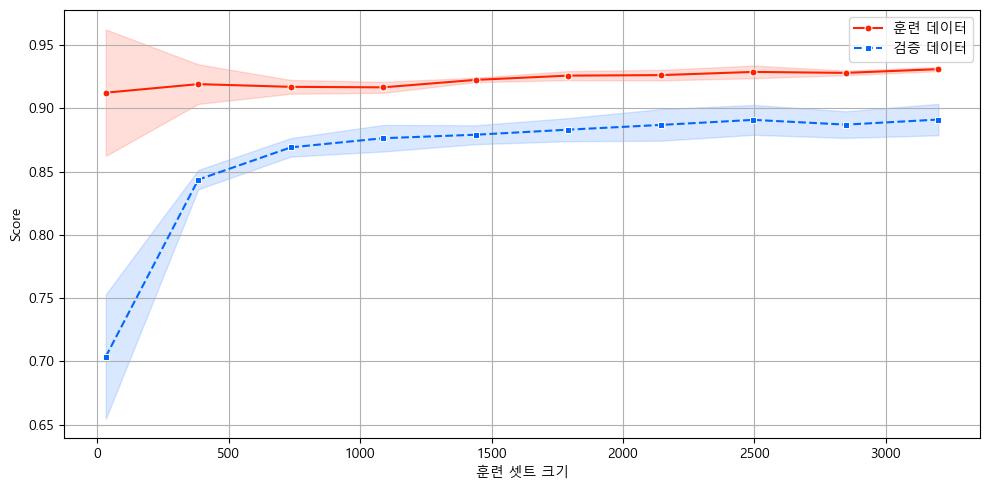

KNeighborsClassifier(n_jobs=-1)

In [117]:
my_classification(KNeighborsClassifier,x_train, y_train, x_test, y_test)

> 로지스틱 회귀분석과 KNN 분석 비교결과
>| 모델 | 정확도 | 정밀도 | 재현율 | 특이도 | AUC |  
>| --- | --- | --- | --- | --- | --- |
>| 로지스틱 | 0.73625 | 0.722892 | 0.757576 | 0.715347 |0.807393 |
>| KNN | 0.89375 | 0.897698 | 0.886364 | 0.90099 | 0.950001 |

> 로지스틱 회귀분석과 KNN 분석 결과 모든 지표에서 KNN이 우세하게 나타났다. 하지만 KNN은 learning curve 결과 과적합의 우려가 있어보인다. 